# Самостоятельное задание

##### Загрузить цветное изображение и преобразовать его таким образом, чтобы только красный цвет оставался цветным, а все остальные цвета изображения были преобразованы в оттенки серого.

In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [40]:
img = cv2.imread('cat.jpeg')

Определяем диапазон красного цвета в HSV и конвертируем изображение в цветовое пространство HSV

In [41]:
lower_red = np.array([0, 50, 50])
upper_red = np.array([10, 255, 255])

hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

Выполняем бинаризацию изображения, оставляя только красные области, используя cv2.inRange() (создает бинарную маску изображения, где белые пиксели соответствуют красному цвету, а черные пиксели - остальным цветам). Применяем маску к изображению, оставляя только красный цвет.

In [46]:
mask = cv2.inRange(hsv, lower_red, upper_red)

red_only = cv2.bitwise_and(img, img, mask=mask)

Преобразуем оставшуюся часть изображения в серый цвет.

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

gray_only = cv2.bitwise_and(gray, gray, mask = cv2.bitwise_not(mask))

Объединяем красный и серый цвета в одно изображение.

In [44]:
result = cv2.bitwise_or(red_only, gray_only)

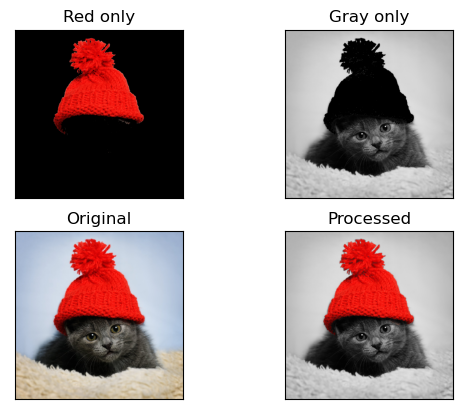

In [50]:
plt.subplot(221), plt.imshow(cv2.cvtColor(red_only, cv2.COLOR_BGR2RGB)), plt.title('Red only')
plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(cv2.cvtColor(gray_only, cv2.COLOR_BGR2RGB)), plt.title('Gray only')
plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB)), plt.title('Processed')
plt.xticks([]), plt.yticks([])
plt.show()